<a href="https://colab.research.google.com/github/jatinkchaudhary/Classification-Problem-/blob/main/VGG16_emotionalRecognition_RAVDESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import librosa.display
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import os
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
import cv2
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers

**CRITICAL MESSAGE : SKIP THE BELOW TWO BOXES - SEE NOTICE BELOW THEM.**

In [ ]:
#!pip install split-folders tqdm


In [ ]:
#import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#splitfolders.ratio("/content/drive/MyDrive/outputs", output="/content/drive/MyDrive/gen_dataset", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

Copying files: 1436 files [17:02,  1.40 files/s]


The above two text boxes should only be run in the condition when our training, test and validation sets are missing. **As it is right now, these have already fulfilled their job and have been run once already**. Thus, skip these two boxes for they take a long time to process and would hurt the presentation and slow down things. To further ensure a lock, I (Abhishek) have commented the code in these two blocks.


**--CRITICAL MESSAGE END--**

LABELING PROCESS BEGINS.

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/gen_dataset/train/angry/*.*')
calm = glob.glob('/content/drive/MyDrive/gen_dataset/train/calm/*.*')
disgust = glob.glob('/content/drive/MyDrive/gen_dataset/train/disgust/*.*')
fearful = glob.glob('/content/drive/MyDrive/gen_dataset/train/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/gen_dataset/train/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/gen_dataset/train/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/gen_dataset/train/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/gen_dataset/train/surprised/*.*')

In [ ]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
X_train=train_data
y_train=train_labels

In [ ]:
import glob
angry = glob.glob('/content/drive/MyDrive/gen_dataset/test/angry/*.*')
calm = glob.glob('/content/drive/My Drive/gen_dataset/test/calm/*.*')
disgust = glob.glob('/content/drive/My Drive/gen_dataset/test/disgust/*.*')
fearful = glob.glob('/content/drive/My Drive/gen_dataset/test/fearful/*.*')
happy = glob.glob('/content/drive/My Drive/gen_dataset/test/happy/*.*')
neutral = glob.glob('/content/drive/My Drive/gen_dataset/test/neutral/*.*')
sad = glob.glob('/content/drive/My Drive/gen_dataset/test/sad/*.*')
surprised = glob.glob('/content/drive/My Drive/gen_dataset/test/surprised/*.*')

In [ ]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [ ]:
X_test=test_data
y_test=test_labels

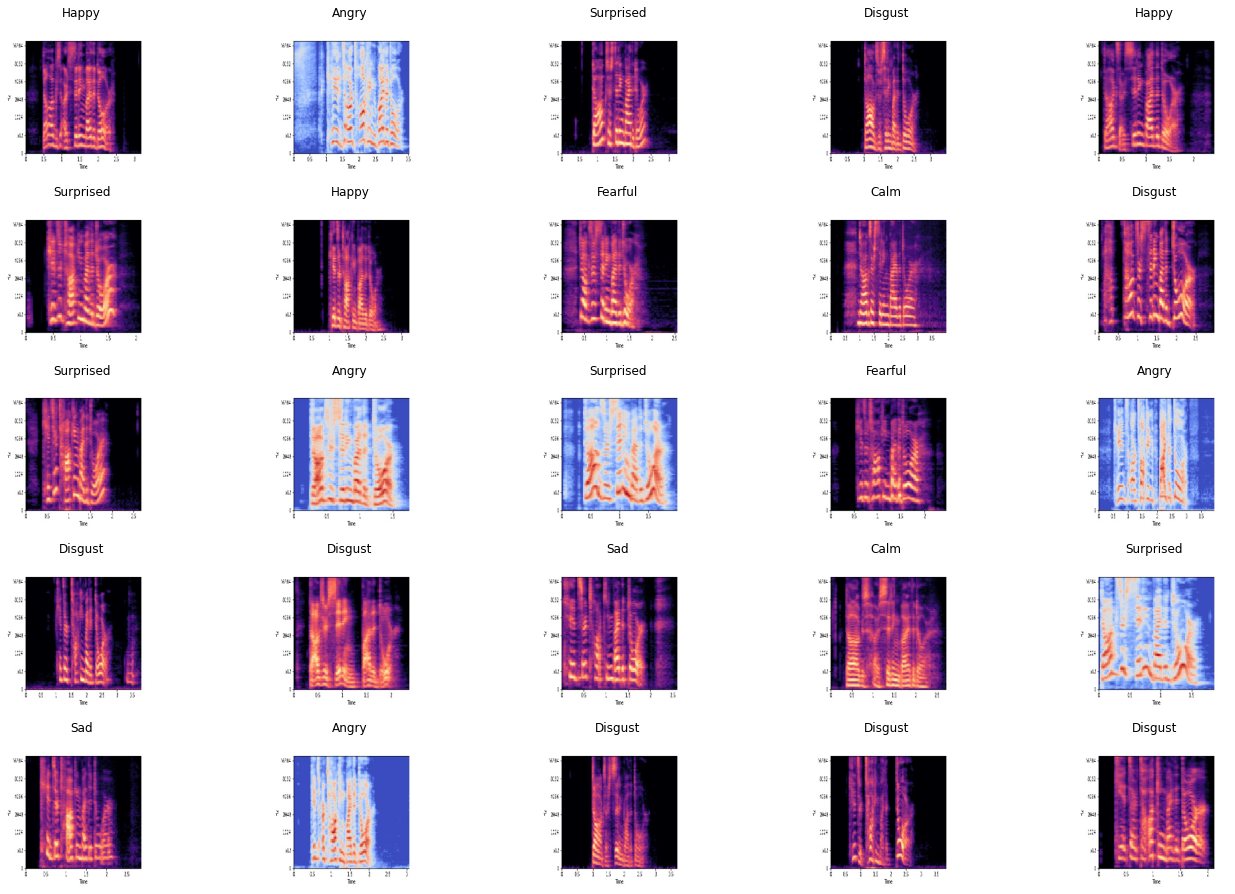

In [ ]:
from random import randint
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1144, 224, 224, 3), y_train has a shape of (1144,)
X_test has a shape of (151, 224, 224, 3), y_test has a shape of (151,)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

**VGG16**

In [ ]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


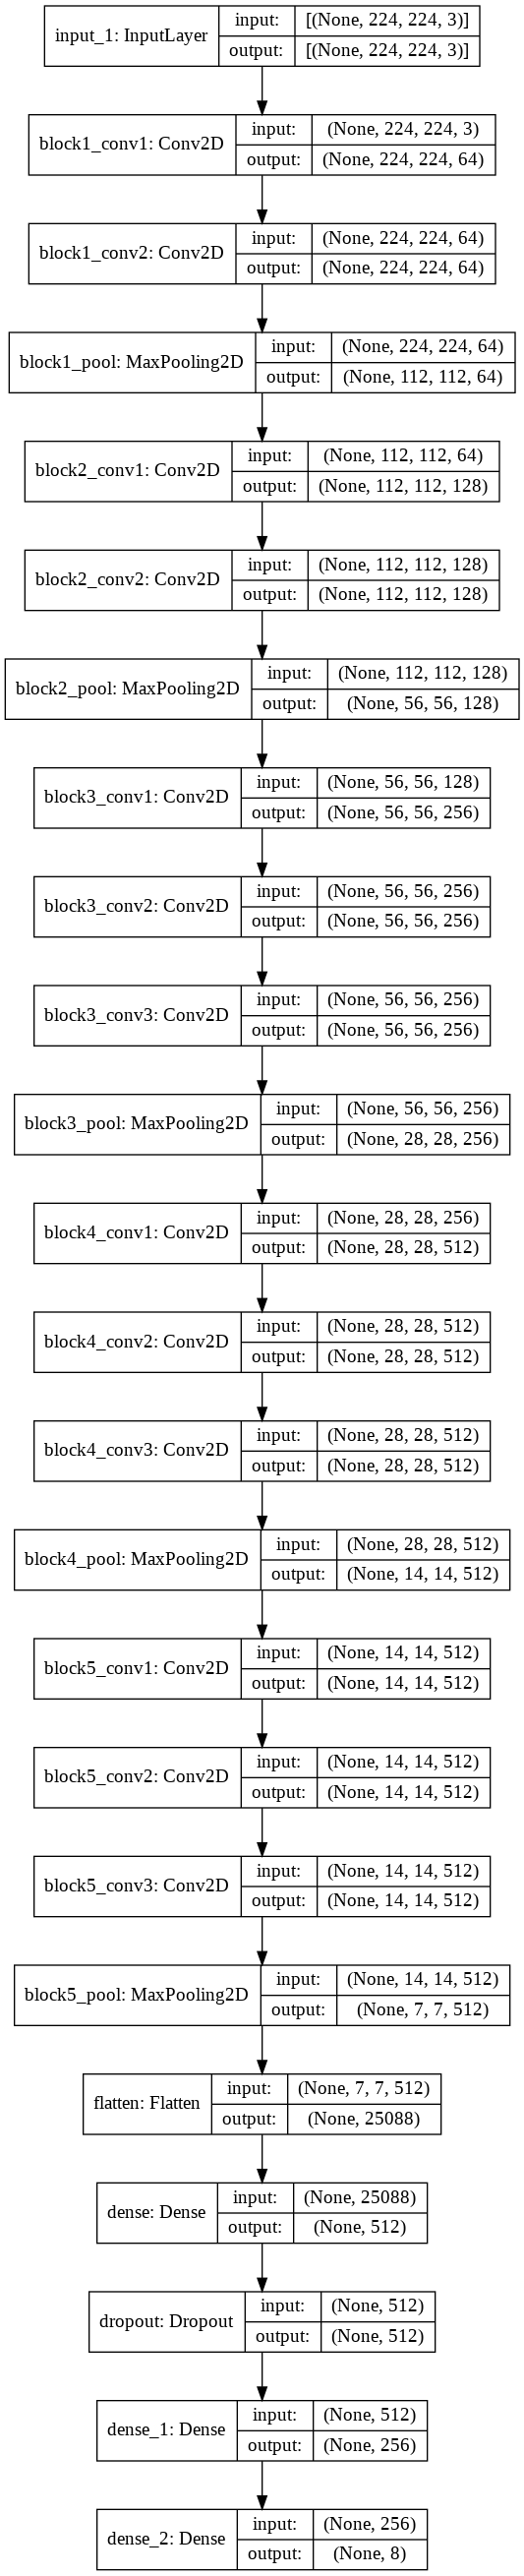

In [ ]:
keras.utils.plot_model(transfer_model, show_shapes=True)


In [ ]:

from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

In [ ]:
history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))


Epoch 1/50
1144/1144 [==============================] - 711s 620ms/step - loss: 2.2164 - accuracy: 0.1730 - val_loss: 1.9360 - val_accuracy: 0.1589
Epoch 2/50
1144/1144 [==============================] - 711s 622ms/step - loss: 1.8970 - accuracy: 0.2735 - val_loss: 1.7127 - val_accuracy: 0.3444
Epoch 3/50
1144/1144 [==============================] - 710s 621ms/step - loss: 1.7786 - accuracy: 0.3332 - val_loss: 1.6747 - val_accuracy: 0.3642
Epoch 4/50
1144/1144 [==============================] - 712s 622ms/step - loss: 1.6680 - accuracy: 0.3535 - val_loss: 1.6058 - val_accuracy: 0.3709
Epoch 5/50
1144/1144 [==============================] - 712s 622ms/step - loss: 1.5299 - accuracy: 0.4305 - val_loss: 1.6275 - val_accuracy: 0.3377
Epoch 6/50
1144/1144 [==============================] - 712s 622ms/step - loss: 1.4975 - accuracy: 0.4154 - val_loss: 1.4460 - val_accuracy: 0.4106
Epoch 7/50
1144/1144 [==============================] - 714s 624ms/step - loss: 1.4307 - accuracy: 0.4707 - val_

In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = transfer_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
transfer_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


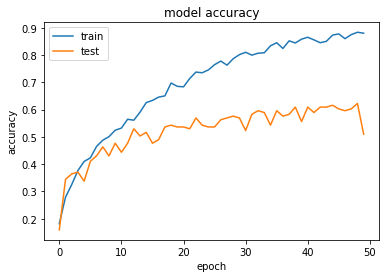

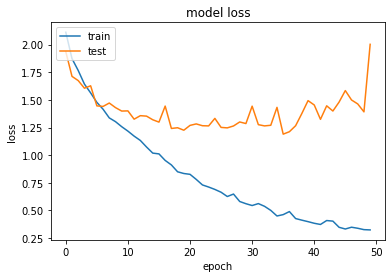

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

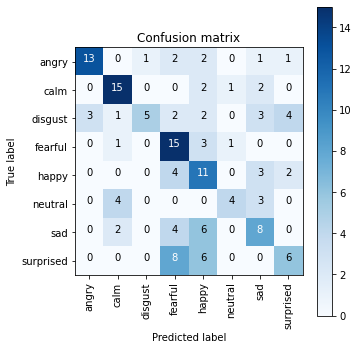

In [ ]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.81      0.65      0.72        20
        calm       0.65      0.75      0.70        20
     disgust       0.83      0.25      0.38        20
     fearful       0.43      0.75      0.55        20
       happy       0.34      0.55      0.42        20
     neutral       0.67      0.36      0.47        11
         sad       0.40      0.40      0.40        20
   surprised       0.46      0.30      0.36        20

    accuracy                           0.51       151
   macro avg       0.57      0.50      0.50       151
weighted avg       0.57      0.51      0.50       151

